In [30]:
import os
import sys
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [31]:
#############################
#path where data is located
data_dir = '/Users/athulapudhiyidath/Dropbox/TJI/tji_date_reports/data'

#change to that path 
os.chdir(data_dir)

# Reading in and restructuring data about civilian-related incidents

In [37]:
#############################
#read in the civillians_shot.csv
civ_shot = pd.read_csv("tji_civiliansShot.csv") 

#look at data
civ_shot

,date_ag_received,date_incident,incident_address,incident_city,incident_county,incident_zip,incident_result_of,incident_call_other,civilian_name_first,civilian_name_last,...,num_officers_recorded,num_reports_filed,num_rows_about_this_incident,officer_age_11,officer_gender_11,officer_on_duty,officer_race_11,time_incident,weapon_reported_by_media,weapon_reported_by_media_category
0,NaN,2015-09-02,1010 MAGNOLIA STREET,FREEPORT,BRAZORIA,77541.0,TRAFFIC STOP,NARCOTIC STOP AND EVADING ARREST,RICKEY,MAYBERRY,...,1,1,1,NaN,NaN,True,NaN,NaN,NaN,NaN
1,NaN,2015-09-03,4840 E. PLANO PARKWAY,PLANO,COLLIN,75074.0,OTHER - SPECIFY TYPE OF CALL,ACCIDENTAL DISCHARGE RICOCHET DURING RANGE ACT...,NaN,NaN,...,1,1,1,NaN,NaN,True,NaN,NaN,NaN,(DETAILS MISSING)
2,NaN,2015-09-04,101 COUCH CT.,SPRINGTOWN,PARKER,76082.0,OTHER - SPECIFY TYPE OF CALL,INVESTIGATION OF CRIMINAL ACTIVITY,SULLY JOE,LANIER,...,2,1,1,NaN,NaN,True,NaN,NaN,FIREARM,FIREARM
3,NaN,2015-09-05,4926 CHENNAULT ROAD,HOUSTON,HARRIS,77033.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,NaN,NaN,...,1,1,1,NaN,NaN,True,NaN,NaN,FIREARM,FIREARM
4,NaN,2015-09-08,1500 RANGE ROAD,"DFW, AIRPORT",TARRANT,75261.0,OTHER - SPECIFY TYPE OF CALL,TRAINING EXERCISE - RICOCHET FRAGMENTS RESULTI...,NaN,NaN,...,1,1,1,NaN,NaN,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,2020-02-25,2020-02-19,1000 CIRCLE LANE,BEDFORD,TARRANT,76022.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE; TRAF...,ASSIST IN LOCATING VEHICLE WHICH FLED FROM ANO...,NaN,NaN,...,1,1,1,NaN,NaN,True,NaN,02:07:00,NaN,NaN
787,2020-02-25,2020-02-22,1117 MESA VERDE DR,MISSOURI CITY,FORT BEND,77489.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,AUSTIN,WILSON,...,1,1,1,NaN,NaN,True,NaN,18:43:00,GUN,FIREARM
788,2020-03-02,2020-02-22,806 AVENUE C,LEVELLAND,HOCKLEY,79336.0,EXECUTION OF A WARRANT,NaN,SAMUEL GARCIA,GARZEZ,...,1,1,1,NaN,NaN,True,NaN,06:17:00,GUN,FIREARM
789,2020-03-04,2020-02-24,305 10TH ST.,FLORESVILLE,WILSON,78114.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,STEPHEN MICHAEL,O'BRIEN,...,1,1,1,NaN,NaN,True,NaN,00:29:00,NaN,NaN


In [35]:
#The columns relevant for analyzing the data are the following:
civ_shot_date = civ_shot['date_incident']
civ_file_date = civ_shot['date_ag_received']

#remove the data that have NaN values in the colums above:
civ_shot_notnan = civ_shot[civ_shot['date_incident'].notna()]
civ_shot_notnan = civ_shot[civ_shot['date_ag_received'].notna()]

#now to reindex the non-NaN data:
civ_shot_notnan = civ_shot_notnan.reset_index(drop=True)

#look at non-NaN civilian data:
civ_shot_notnan

,date_ag_received,date_incident,incident_address,incident_city,incident_county,incident_zip,incident_result_of,incident_call_other,civilian_name_first,civilian_name_last,...,num_officers_recorded,num_reports_filed,num_rows_about_this_incident,officer_age_11,officer_gender_11,officer_on_duty,officer_race_11,time_incident,weapon_reported_by_media,weapon_reported_by_media_category
0,2017-02-07,2015-11-17,1655 BLUE BELL ROAD,HOUSTON,HARRIS,77038.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,JERAY DILRICHARD,CHATHAM,...,1,1,1,NaN,NaN,True,NaN,18:55:00,KNIFE,KNIFE/CUTTING
1,2017-02-08,2016-03-05,655 S. 23RD,BEAUMONT,JEFFERSON,77707.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,HERBERT EDGAR,BALLANCE,...,1,1,1,NaN,NaN,True,NaN,16:49:00,NaN,(DETAILS MISSING)
2,2017-02-23,2016-04-16,NaN,VICTORIA,VICTORIA,78904.0,OTHER - SPECIFY TYPE OF CALL,DECEDENT BROKE INTO THE OFFICERS RESIDENCE.,WADE AUSTIN,KLOESEL,...,1,1,1,NaN,NaN,False,NaN,03:26:00,NaN,NaN
3,2017-02-23,2016-07-07,801 MAIN ST.,DALLAS,DALLAS,75215.0,OTHER - SPECIFY TYPE OF CALL,AMBUSH OF OFFICERS BY SUSPECT. WOUNDED ON 7/7/...,MICAH XAVIER,JOHNSON,...,10,10,1,NaN,NaN,True,NaN,21:00:00,NaN,(DETAILS MISSING)
4,2017-02-09,2016-07-15,6155 W. UNIVERSITY,ODESSA,ECTOR,79763.0,OTHER - SPECIFY TYPE OF CALL,DEPUTIES WERE IN PURSUIT OF A STOLEN VEHICLE O...,GEORGE,ALFARO,...,1,1,1,NaN,NaN,True,NaN,11:40:00,PISTOL,FIREARM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2020-02-25,2020-02-19,1000 CIRCLE LANE,BEDFORD,TARRANT,76022.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE; TRAF...,ASSIST IN LOCATING VEHICLE WHICH FLED FROM ANO...,NaN,NaN,...,1,1,1,NaN,NaN,True,NaN,02:07:00,NaN,NaN
556,2020-02-25,2020-02-22,1117 MESA VERDE DR,MISSOURI CITY,FORT BEND,77489.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,AUSTIN,WILSON,...,1,1,1,NaN,NaN,True,NaN,18:43:00,GUN,FIREARM
557,2020-03-02,2020-02-22,806 AVENUE C,LEVELLAND,HOCKLEY,79336.0,EXECUTION OF A WARRANT,NaN,SAMUEL GARCIA,GARZEZ,...,1,1,1,NaN,NaN,True,NaN,06:17:00,GUN,FIREARM
558,2020-03-04,2020-02-24,305 10TH ST.,FLORESVILLE,WILSON,78114.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,STEPHEN MICHAEL,O'BRIEN,...,1,1,1,NaN,NaN,True,NaN,00:29:00,NaN,NaN


## Total number of civillian incident reports

In [38]:
print(len(civ_shot))

791


## Total number of civillian incident reports with incident date + Attorney General recieved date:

In [43]:
print(len(civ_shot_notnan))

560


# Reading in and restructuring data about officer-related incidents

In [40]:
#############################
#read in the officrs_shot.csv
off_shot = pd.read_csv("tji_officersShot.csv") 

#look at data
off_shot

,date_ag_received,date_incident,incident_address,incident_city,incident_county,incident_zip,officer_harm,officer_name_first,officer_name_last,officer_age,...,civilian_race_2,civilian_gender_2,civilian_name_first_3,civilian_name_last_3,civilian_age_3,civilian_race_3,civilian_gender_3,media_link_1,media_link_2,media_link_3
0,NaN,2015-10-06 00:00:00,815 LAMAR DRIVE,SEGUIN,GUADALUPE,78155,INJURY,NaN,NaN,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2015-10-30 00:00:00,8000 MIDCROWN,SAN ANTONIO,BEXAR,78218,INJURY,JOSEPH,CANALES,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MYSA,NEWS4SANANTONIO,NaN
2,2017-02-21 00:00:00,2015-11-01 00:00:00,301 W. AVENUE B,TEMPLE,BELL,76501,DEATH,DARRELL,ALLEN,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WACO TRIBUNE-HERALD,NaN,NaN
3,NaN,2015-12-23 00:00:00,1025 CUSTER AVE.,ODESSA,ECTOR,79761,INJURY,PETE,GONZALES,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CBS 7,BIG COUNTRY,NaN
4,NaN,2015-12-23 00:00:00,1025 CUSTER AVE.,ODESSA,ECTOR,79761,INJURY,CORY,WESTER,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CBS 7,BIG COUNTRY,NaN
5,NaN,2016-01-13 00:00:00,3100 ANITA,HOUSTON,HARRIS,77004,INJURY,KENNETH,FREGIA,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHRONICLE,ABC 13,NaN
6,NaN,2016-01-19 00:00:00,6011 VAN ZANDT,HOUSTON,HARRIS,77016,INJURY,JASON,RHODES,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHRONICLE,CLICK2HOUSTON,NaN
7,NaN,2016-02-07 00:00:00,1410 ASHLAND DRIVE,CONROE,MONTGOMERY,77385,INJURY,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2016-02-22 00:00:00,5100 CLOVER,HOUSTON,HARRIS,77021,INJURY,NaN,NaN,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CW39,HOUSTONTX.GOV,NaN
9,2017-02-14 00:00:00,2016-03-01 00:00:00,508 SIMMONS DR.,EULESS,TARRANT,76040,DEATH,DAVID STEFAN,HOFER,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DALLAS MORNING NEWS,NBC DFW,NaN


In [ ]:
#The columns relevant for analyzing the data are the following:
off_shot_date = off_shot['date_incident']
off_file_date = off_shot['date_ag_received']

#remove the data that have NaN values in the colums above:
off_shot_notnan = off_shot[off_shot['date_incident'].notna()]
off_shot_notnan = off_shot[off_shot['date_ag_received'].notna()]

#now to reindex the the non-NaN data:
off_shot_notnan = off_shot_notnan.reset_index(drop=True)

# Dates between incident and report for civillians 

#### Creating a function to figure out the days between incident and reporting:

In [47]:
def civ_days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

#### Looping through data to figure out the days between reporting of each incident:

In [48]:
civ_date_count = []
for n in range(len(civ_shot_notnan)):
    this_civ_shot_date = civ_shot_notnan['date_incident'][n]
    this_civ_file_date = civ_shot_notnan['date_ag_received'][n]
    days = civ_days_between(this_civ_file_date, this_civ_shot_date)
    civ_date_count.append(days)
    
civ_shot_notnan.insert(2, "date_count", civ_date_count, True)     

print(civ_shot_notnan)

    date_ag_received date_incident  date_count     incident_address  \
0         2017-02-07    2015-11-17         448  1655 BLUE BELL ROAD   
1         2017-02-08    2016-03-05         340          655 S. 23RD   
2         2017-02-23    2016-04-16         313                  NaN   
3         2017-02-23    2016-07-07         231         801 MAIN ST.   
4         2017-02-09    2016-07-15         209   6155 W. UNIVERSITY   
..               ...           ...         ...                  ...   
555       2020-02-25    2020-02-19           6     1000 CIRCLE LANE   
556       2020-02-25    2020-02-22           3   1117 MESA VERDE DR   
557       2020-03-02    2020-02-22           9         806 AVENUE C   
558       2020-03-04    2020-02-24           9         305 10TH ST.   
559       2020-03-03    2020-03-01           2   14406 MAISEMORE RD   

     incident_city incident_county  incident_zip  \
0          HOUSTON          HARRIS       77038.0   
1         BEAUMONT       JEFFERSON       77

In [49]:
civ_city_list = list(civ_shot_notnan['incident_city'].unique())
city_count_list = []
for n in range(len(civ_city_list)-1):
    this_city = civ_city_list[n]
    this_city_data = civ_shot_notnan.loc[civ_shot_notnan['incident_city'] == this_city]
    this_city_date_mean = np.mean(this_city_data['date_count'])
    city_count_list.append({'City': this_city, 'Mean': this_city_date_mean})

civ_county_df = pd.DataFrame(city_count_list)
civ_county_df

,City,Mean
0,HOUSTON,26.039474
1,BEAUMONT,74.600000
2,VICTORIA,313.000000
3,DALLAS,13.240000
4,ODESSA,57.777778
5,HIGHLANDS,178.000000
6,HARKER HEIGHTS,161.000000
7,SPRING,40.833333
8,MINEOLA,149.000000
9,SAN ANTONIO,28.854545


In [10]:
civ_city_list = list(civ_shot_notnan['incident_city'].unique())
mean_civ_count_list = []
over_civ_count_list = []
for n in range(len(civ_city_list)-1):
    this_city = civ_city_list[n]
    this_city_data = civ_shot_notnan.loc[civ_shot_notnan['incident_city'] == this_city]
    this_city_total = len(this_city_data) #total incidents
    
    this_city_date_mean = np.mean(this_city_data['date_count'])
    mean_civ_count_list.append({'City': this_city, 'Mean': this_city_date_mean})
    mean_civ_count_df = pd.DataFrame(mean_civ_count_list)
    
    tally_over_30 = []
    for t in range(this_city_total):
        this_city_count = this_city_data.iloc[t-1].date_count
        
        if this_city_count > 30:
            tally_over_30.append(1)
        else:
            tally_over_30.append(0) 
    
    total_over_30 = np.sum(tally_over_30)
    prop_over_30 = np.mean(tally_over_30)
    over_civ_count_list.append({'City': this_city, 'Total_Over30': total_over_30, 'Total': this_city_total, 'Prop_Over30': prop_over_30})    
    over_civ_count_df = pd.DataFrame(over_civ_count_list)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
civ_county_df_asc = mean_civ_count_df.sort_values(by='Mean', ascending=False)
civ_county_df_asc = civ_county_df_asc.reset_index(drop=True)
print(civ_county_df_asc)

           City   Mean
0         TYLER  738.0
1      ROSHARON  365.0
2     CAMP WOOD  364.0
3      VICTORIA  313.0
4     HIGHLANDS  178.0
..          ...    ...
186     KILGORE    0.0
187   FAIRFIELD    0.0
188      SANDIA    0.0
189  CEDAR HILL    0.0
190         NaN    NaN

[191 rows x 2 columns]


## Mean days between incident and filing report for civillians shot

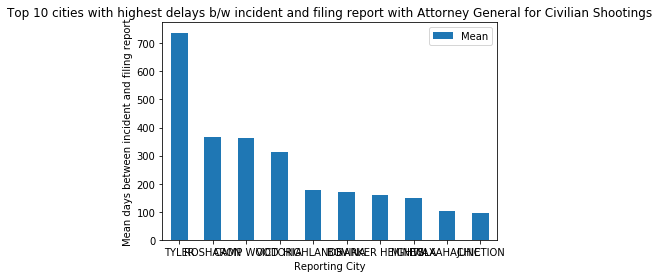

In [12]:
civ_county_df_asc_1 = civ_county_df_asc[0:10]
ax = civ_county_df_asc_1.plot.bar(x='City', y='Mean', rot=0)
ax.set_title('Top 10 cities with highest delays b/w incident and filing report with Attorney General for Civilian Shootings')
ax.set_xlabel('Reporting City')
ax.set_ylabel('Mean days between incident and filing report')
plt.rcParams["figure.figsize"] = (20,10)

In [13]:
pd.set_option('display.max_rows', 200)
over_civ_count_df

,City,Total_Over30,Total,Prop_Over30
0,HOUSTON,10.0,76,0.131579
1,BEAUMONT,1.0,5,0.200000
2,VICTORIA,1.0,1,1.000000
3,DALLAS,1.0,25,0.040000
4,ODESSA,3.0,9,0.333333
5,HIGHLANDS,1.0,1,1.000000
6,HARKER HEIGHTS,1.0,1,1.000000
7,SPRING,2.0,6,0.333333
8,MINEOLA,1.0,1,1.000000
9,SAN ANTONIO,9.0,55,0.163636


In [14]:
#take the over_civ_count_df and sort it ascendingly 
#take the over_off_count_df and sort it ascendingly 
over_civ_count_df_asc = over_civ_count_df.sort_values(by='Total_Over30', ascending=False)
over_civ_count_df_asc = over_civ_count_df_asc.reset_index(drop=True)
over_civ_count_df_asc

,City,Total_Over30,Total,Prop_Over30
0,HOUSTON,10.0,76,0.131579
1,SAN ANTONIO,9.0,55,0.163636
2,LAREDO,6.0,11,0.545455
3,ODESSA,3.0,9,0.333333
4,FORT WORTH,3.0,22,0.136364
5,ARLINGTON,2.0,11,0.181818
6,AUSTIN,2.0,24,0.083333
7,DENTON,2.0,2,1.000000
8,SPRING,2.0,6,0.333333
9,SCHERTZ,2.0,2,1.000000


In [15]:
over_civ_count_df_asc_10 = over_civ_count_df_asc[0:10]
over_civ_count_df_asc_10

,City,Total_Over30,Total,Prop_Over30
0,HOUSTON,10.0,76,0.131579
1,SAN ANTONIO,9.0,55,0.163636
2,LAREDO,6.0,11,0.545455
3,ODESSA,3.0,9,0.333333
4,FORT WORTH,3.0,22,0.136364
5,ARLINGTON,2.0,11,0.181818
6,AUSTIN,2.0,24,0.083333
7,DENTON,2.0,2,1.000000
8,SPRING,2.0,6,0.333333
9,SCHERTZ,2.0,2,1.000000


## Total number of reports made vs. number of reports after 30-days for civillians shot

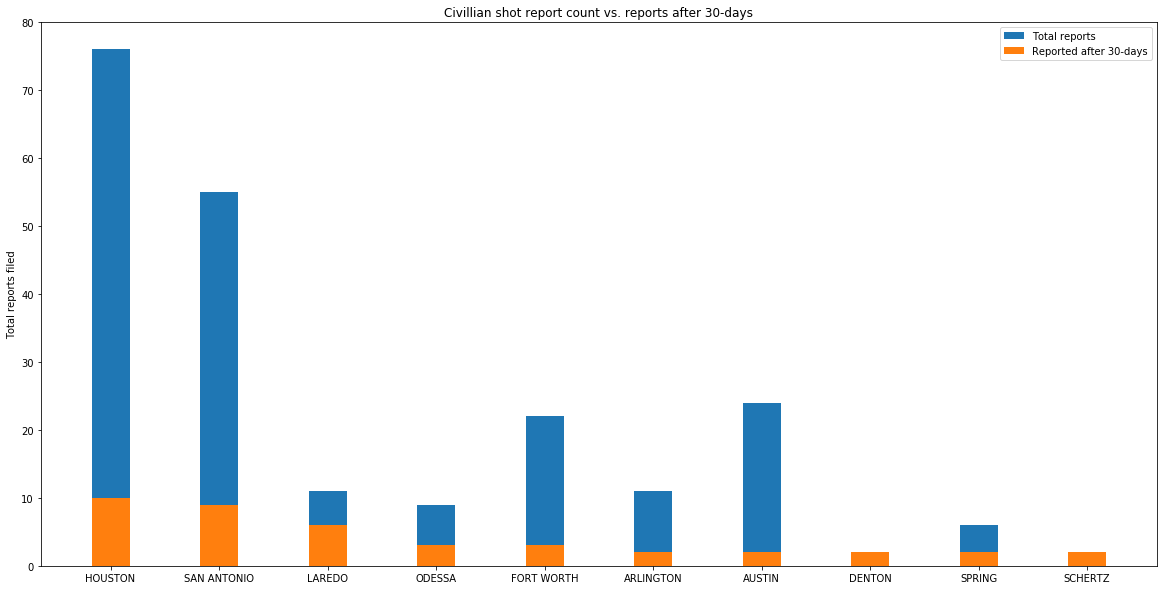

In [16]:
N = len(over_civ_count_df_asc_10)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, over_civ_count_df_asc_10['Total'], width)
p2 = plt.bar(ind, over_civ_count_df_asc_10['Total_Over30'], width, bottom=0)

plt.ylabel('Total reports filed')
plt.title('Civillian shot report count vs. reports after 30-days')
plt.xticks(ind, (over_civ_count_df_asc_10['City']))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Total reports', 'Reported after 30-days'))

plt.show()

# Dates between incident and report for officers shot 

In [17]:

def off_days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d %H:%M:%S")
    d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
    return abs((d2 - d1).days)

## Total number of officer shot reports:

In [18]:
print(len(off_shot))

137


## Total number of civillian shot reports with incident date + Attorney General recieved date:

In [19]:
print(len(off_shot_notnan))

120


In [20]:
##################################################
#TOTAL NUMBER OF CIVILLIAN SHOT DATA vs. FULL DATA
print(len(off_shot))
print(len(off_shot_notnan))

137
120


In [21]:
off_date_count = []
for n in range(len(off_shot_notnan)):
    this_off_shot_date = off_shot_notnan['date_incident'][n]
    this_off_file_date = off_shot_notnan['date_ag_received'][n]
    days = off_days_between(this_off_file_date, this_off_shot_date)
    off_date_count.append(days)
    
off_shot_notnan.insert(2, "date_count", off_date_count, True)     

print(off_shot_notnan)

        date_ag_received        date_incident  date_count  \
0    2017-02-21 00:00:00  2015-11-01 00:00:00         478   
1    2017-02-14 00:00:00  2016-03-01 00:00:00         350   
2    2016-07-20 00:00:00  2016-07-07 00:00:00          13   
3    2016-07-20 00:00:00  2016-07-07 00:00:00          13   
4    2016-07-20 00:00:00  2016-07-07 00:00:00          13   
5    2016-07-20 00:00:00  2016-07-07 00:00:00          13   
6    2017-01-19 00:00:00  2016-07-07 00:00:00         196   
7    2017-01-19 00:00:00  2016-07-07 00:00:00         196   
8    2017-01-19 00:00:00  2016-07-07 00:00:00         196   
9    2017-01-19 00:00:00  2016-07-07 00:00:00         196   
10   2017-01-25 00:00:00  2016-07-07 00:00:00         202   
11   2017-01-25 00:00:00  2016-07-07 00:00:00         202   
12   2017-01-25 00:00:00  2016-07-07 00:00:00         202   
13   2017-02-01 00:00:00  2016-07-07 00:00:00         209   
14   2017-02-01 00:00:00  2016-07-07 00:00:00         209   
15   2016-09-09 00:00:00

In [22]:
off_city_list = list(off_shot_notnan['incident_city'].unique())
mean_count_list = []
over_count_list = []
for n in range(len(off_city_list)-1):
    this_city = off_city_list[n]
    this_city_data = off_shot_notnan.loc[off_shot_notnan['incident_city'] == this_city]
    this_city_total = len(this_city_data) #total incidents
    
    this_city_date_mean = np.mean(this_city_data['date_count'])
    mean_count_list.append({'City': this_city, 'Mean': this_city_date_mean})
    mean_count_df = pd.DataFrame(mean_count_list)
    
    tally_over_30 = []
    for t in range(this_city_total):
        this_city_count = this_city_data.iloc[t-1].date_count
        
        if this_city_count > 30:
            tally_over_30.append(1)
        else:
            tally_over_30.append(0) 
    
    total_over_30 = np.sum(tally_over_30)
    prop_over_30 = np.mean(tally_over_30)
    over_count_list.append({'City': this_city, 'Total_Over30': total_over_30, 'Total': this_city_total, 'Prop_Over30': prop_over_30})    
    over_off_count_df = pd.DataFrame(over_count_list)

In [23]:
mean_count_df_asc = mean_count_df.sort_values(by='Mean', ascending=False)
mean_count_df_asc = mean_count_df_asc.reset_index(drop=True)
mean_count_df_asc

,City,Mean
0,TEMPLE,478.000000
1,EULESS,350.000000
2,MIDLAND,314.000000
3,DENTON,126.000000
4,PALESTINE,123.000000
5,DALLAS,104.166667
6,SAN ANTONIO,89.454545
7,SANTA FE,54.000000
8,FORT WORTH,50.333333
9,SUGAR LAND,48.000000


## Mean days between incident and filing report for officers shot

Text(0, 0.5, 'Mean days between incident and filing report')

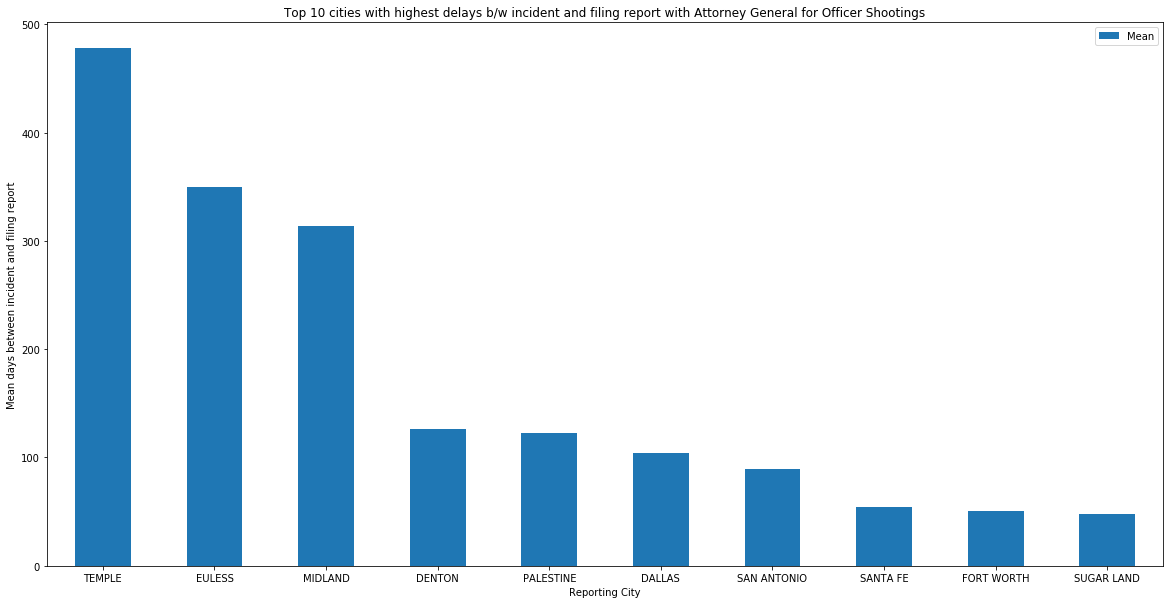

In [24]:
mean_count_df_asc = mean_count_df_asc[0:10]
ax = mean_count_df_asc.plot.bar(x='City', y='Mean', rot=0)
ax.set_title('Top 10 cities with highest delays b/w incident and filing report with Attorney General for Officer Shootings')
ax.set_xlabel('Reporting City')
ax.set_ylabel('Mean days between incident and filing report')


In [25]:
over_off_count_df

,City,Total_Over30,Total,Prop_Over30
0,TEMPLE,1,1,1.000000
1,EULESS,1,1,1.000000
2,DALLAS,9,18,0.500000
3,KATY,0,2,0.000000
4,FORT WORTH,2,3,0.666667
5,CLEBURNE,0,1,0.000000
6,HOUSTON,1,20,0.050000
7,SAN ANTONIO,3,11,0.272727
8,FRONTON,0,1,0.000000
9,LAREDO,8,10,0.800000


In [26]:
#take the over_off_count_df and sort it ascendingly 
over_off_count_df_asc = over_off_count_df.sort_values(by='Total_Over30', ascending=False)
over_off_count_df_asc = over_off_count_df_asc.reset_index(drop=True)
over_off_count_df_asc

,City,Total_Over30,Total,Prop_Over30
0,DALLAS,9,18,0.500000
1,LAREDO,8,10,0.800000
2,SAN ANTONIO,3,11,0.272727
3,FORT WORTH,2,3,0.666667
4,TEMPLE,1,1,1.000000
5,ARLINGTON,1,3,0.333333
6,DENTON,1,1,1.000000
7,PALESTINE,1,1,1.000000
8,EL PASO,1,2,0.500000
9,MIDLAND,1,1,1.000000


In [27]:
over_off_count_df_asc_10 = over_off_count_df_asc[0:10]
over_off_count_df_asc_10

,City,Total_Over30,Total,Prop_Over30
0,DALLAS,9,18,0.500000
1,LAREDO,8,10,0.800000
2,SAN ANTONIO,3,11,0.272727
3,FORT WORTH,2,3,0.666667
4,TEMPLE,1,1,1.000000
5,ARLINGTON,1,3,0.333333
6,DENTON,1,1,1.000000
7,PALESTINE,1,1,1.000000
8,EL PASO,1,2,0.500000
9,MIDLAND,1,1,1.000000


## Total number of reports made vs. number of reports after 30-days for officers shot

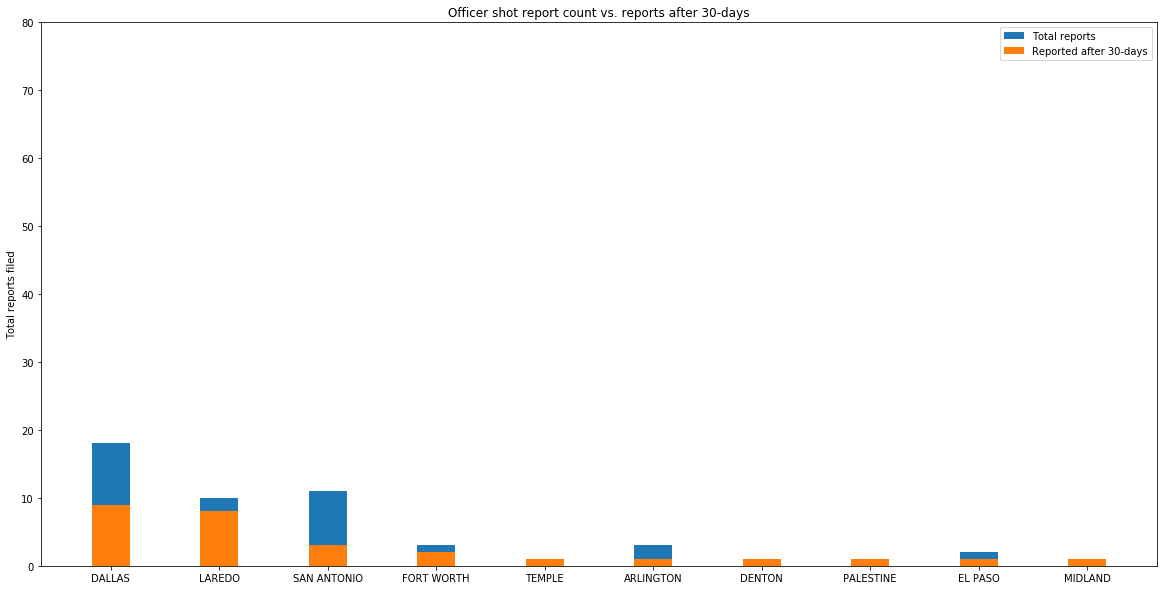

In [28]:
N = len(over_off_count_df_asc_10)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, over_off_count_df_asc_10['Total'], width)
p2 = plt.bar(ind, over_off_count_df_asc_10['Total_Over30'], width, bottom=0)

plt.ylabel('Total reports filed')
plt.title('Officer shot report count vs. reports after 30-days')
plt.xticks(ind, (over_off_count_df_asc_10['City']))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Total reports', 'Reported after 30-days'))

plt.show()